In [7]:
import numpy as np
import xarray as xr
import geoutils.preprocessing.interpolate as interp
import geoutils.preprocessing.open_nc_file as of
import geoutils.plotting.plots as cplt
from importlib import reload

data_folder = '/home/strnad/Nextcloud/tmp/'
data_file1 = f'{data_folder}/lai_3xCO2_CESM.nc'
data_file2 = f'{data_folder}/lai_3xCO2_COSMOS.nc'


In [73]:
reload(interp)
reload(of)
data1 = xr.open_dataset(data_file1)
data1_of = of.open_nc_file(data_file2)

method = 'nearest'
grid_step = 1
data1_nearest = interp.interpolate_grid(dataarray=data1,
                                        method=method,
                                        grid_step=grid_step)
data1_linear = interp.interpolate_grid(dataarray=data1_of,
                                       method='linear',
                                       grid_step=grid_step)

Start processing data!
Chunk the data
Rename:Lon : lon
['lon', 'Lat', 'year']
Rename:Lat : lat
['lon', 'lat', 'year']
Sorted longitudes and latitudes in ascending order!
End processing data! Dimensions: ['lon', 'lat', 'year']
WARNING! Set max lon from 357.5 to 359.75 and 0.0 to 0!
Interpolte grid from 0.0 to 359.0,-90.0 to 80.0!
WARNING! Set max lon from 356.25 to 359.75 and 0.0 to 0!
Interpolte grid from 0.0 to 359.0,-90.0 to 78.0!


In [75]:
data1_nearest

<xarray.Dataset>
Dimensions:  (year: 100, lon: 360, lat: 171)
Coordinates:
  * year     (year) int64 1 2 3 4 5 6 7 8 9 10 ... 92 93 94 95 96 97 98 99 100
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 77.0 78.0 79.0 80.0
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables: (12/18)
    BNE      (year, lon, lat) float64 0.9213 1.395 1.395 1.309 ... nan nan nan
    BINE     (year, lon, lat) float64 0.1191 0.2686 0.2686 0.324 ... nan nan nan
    BNS      (year, lon, lat) float64 0.0126 0.0251 0.0251 ... nan nan nan
    TeNE     (year, lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    TeBS     (year, lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    IBS      (year, lon, lat) float64 0.0048 0.0129 0.0129 ... nan nan nan
    ...       ...
    TeSSh    (year, lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    TrESh    (year, lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    TrRSh    (year, lon, lat) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan nan nan
    BESh     (year, lon, lat) float64 0.4792 0.4414 0.4414 ... nan nan nan
    BSSh     (year, lon, lat) float64 0.0114 0.0311 0.0311 ... nan nan nan
    Total    (year, lon, lat) float64 1.548 2.175 2.175 2.124 ... nan nan nan

WARNING! Central longitude set to 180 but has no effect since axis argument is passed is 0!
WARNING! Central longitude set to 180 but has no effect since axis argument is passed is 0!
WARNING! Central longitude set to 180 but has no effect since axis argument is passed is 0!


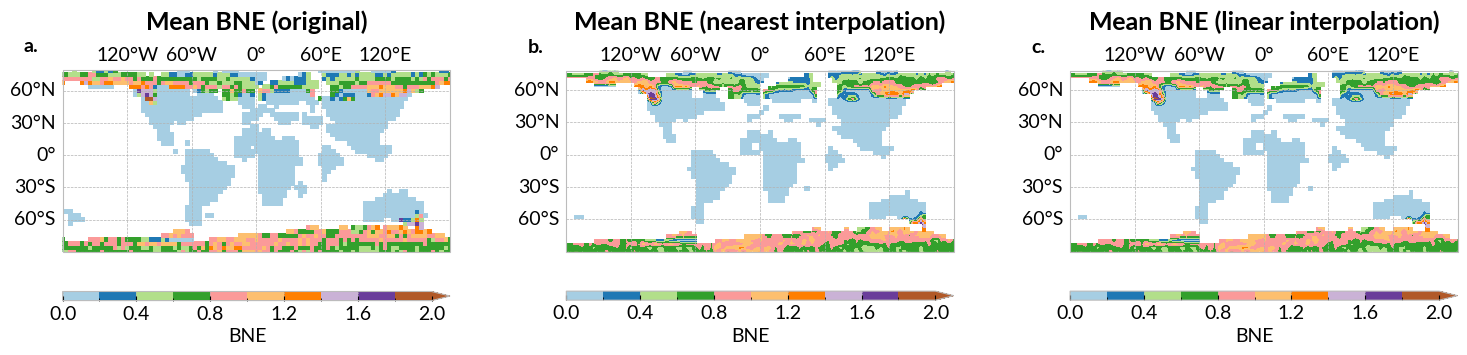

In [76]:
label_lai = 'BNE'

mean_BNE_nearest = data1_nearest[label_lai].mean(dim='year')
mean_BNE_linear = data1_linear[label_lai].mean(dim='year')
mean_BNE_orig = data1_of[label_lai].mean(dim='year')

vmin_bne = 0
vmax_bne = 2

im = cplt.create_multi_plot(nrows=1, ncols=3, figsize=(18, 5),
                            projection='PlateCarree', wspace=0.3,)

cplt.plot_map(mean_BNE_orig.T,
                   ax=im['ax'][0],
                   title=f'Mean BNE (original)',
                   plot_type='colormesh',
                   cmap='Paired',
                   levels=10,
                   label=label_lai,
                   vmin=vmin_bne, vmax=vmax_bne,
                   tick_step=2,
                   extend='max',
                   orientation='horizontal',
                   set_map=False,
                   )

im2 = cplt.plot_map(mean_BNE_linear.T,
                   ax=im['ax'][1],
                   title=f'Mean BNE (nearest interpolation)',
                   plot_type='colormesh',
                   cmap='Paired',
                   levels=10,
                   label=label_lai,
                   vmin=vmin_bne, vmax=vmax_bne,
                   tick_step=2,
                   extend='max',
                   orientation='horizontal',
                   set_map=False,
                   )

im2 = cplt.plot_map(mean_BNE_linear.T,
                   ax=im['ax'][2],
                   title=f'Mean BNE (linear interpolation)',
                   plot_type='colormesh',
                   cmap='Paired',
                   levels=10,
                   label=label_lai,
                   vmin=vmin_bne, vmax=vmax_bne,
                   tick_step=2,
                   extend='max',
                   orientation='horizontal',
                   set_map=False,
                   )

In [25]:
mean_BNE

<xarray.Dataset>
Dimensions:  (lon: 360, lat: 171)
Coordinates:
  * lat      (lat) float64 -90.0 -89.0 -88.0 -87.0 -86.0 ... 77.0 78.0 79.0 80.0
  * lon      (lon) float64 -180.0 -179.0 -178.0 -177.0 ... 177.0 178.0 179.0
Data variables: (12/18)
    BNE      (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    BINE     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    BNS      (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    TeNE     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    TeBS     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    IBS      (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    ...       ...
    TeSSh    (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    TrESh    (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    TrRSh    (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    BESh     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    BSSh     (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>
    Total    (lon, lat) float64 dask.array<chunksize=(360, 171), meta=np.ndarray>